# Исследование объявлений о продаже квартир

В проекте рассматриваются данные сервиса Яндекс.Недвижимость о квартирах в Санкт-Петербурге и Ленинградской области. Цель проекта - выявить факторы, влияющие на стоимость квартиры.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


### Оглавление

* [Шаг 1 Изучение данных](#Шаг_1)
* [Шаг 2 Предобработка данных](#Шаг_2)
* [Шаг 3 Добавление новых признаков в датасет](#Шаг_3)
* [Шаг 4 Исследовательский анализ данных](#Шаг_4)
* [Шаг 5 Общий вывод](#Шаг_5)
___

<a id='Шаг_1'></a>
### Шаг 1. Изучение данных. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
#процент пропусков
df.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

### Вывод

* В данных большое количество пропусков, для некоторых признаков пропуски составляют больше 50%. В основном пропуски встречаются в признаках полученных автоматически (расстояние до различных объетов), либо в признаках, где отсутствие ответа может означать отрицательный ответ (is_apartment, balcony).

* Для некоторых признаков можно изменить тип данных. Например, для balcony (число балконов) можно использовать int.

___
<a id='Шаг_2'></a>
### Шаг 2. Предобработка данных

Заполним пропуски в столбцах: ceiling_height, floors_total, living_area, kitchen_area, is_apartment, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

<a id='floors_total'></a>
**floors_total**

Рассмотрим на каких этажах находятся квартиры, для которых не указана этажность здания 

In [6]:
df.query('floors_total.isna()').groupby('floor')['total_images'].count()

floor
1      3
2      2
3      4
4     10
5      4
6      9
7      4
8      8
9      5
10     3
11     3
12     6
13     3
14     2
15     3
17     1
18     3
19     3
20     2
21     4
22     1
23     1
24     2
Name: total_images, dtype: int64

Мне это ни о чем не говорит, поэтому буду считать, что этажность дома равна этажу квартиры

In [7]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])
df.floors_total.isna().mean()

0.0

<a id='ceiling_height'></a>
**ceiling_height**

Высота потолков скорее всего зависит от количества этажей в доме

              ceiling_height
floors_total                
1.0                     2.80
2.0                     2.70
3.0                     2.80
4.0                     3.00
5.0                     2.55
6.0                     3.00
7.0                     3.00
8.0                     2.80
9.0                     2.55
10.0                    2.60
11.0                    2.75
12.0                    2.65
13.0                    2.70
14.0                    2.60
15.0                    2.70
16.0                    2.70
17.0                    2.70
18.0                    2.70
19.0                    2.75
20.0                    2.75
21.0                    2.70
22.0                    2.75
23.0                    2.75
24.0                    2.75
25.0                    2.75
26.0                    2.66
27.0                    2.70
28.0                    2.60
29.0                    2.60
34.0                    2.65
35.0                    2.70
36.0                   14.85
37.0          

Text(0, 0.5, 'Высота потолка')

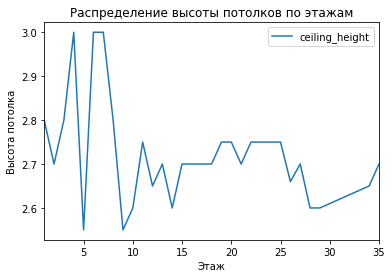

In [8]:
df_ceiling_floor = df.pivot_table(index = 'floors_total', values = 'ceiling_height', aggfunc = 'median')
print(df_ceiling_floor)
df_ceiling_floor[:35].plot(title = 'Распределение высоты потолков по этажам')
plt.xlabel('Этаж')
plt.ylabel('Высота потолка')

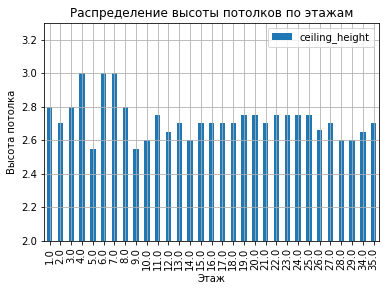

In [79]:
df_ceiling_floor[:35].plot(kind = 'bar', title = 'Распределение высоты потолков по этажам')
plt.ylim((2, 3.3))
plt.xlabel('Этаж')
plt.ylabel('Высота потолка')
plt.grid()
plt.show();

По графику видно, что у 5 и 9 этажных домов потолки ниже, чем в других домах. Видимо большинство этих домой - хрущевки.
Отдельно нужно рассмотреть 36 и 37 этажные дома

In [10]:
df.query('floors_total in (36, 37)').T

,397,5807,11079,16934
total_images,15,17,16,5
last_price,5.99e+06,8.15e+06,9.2e+06,4.1e+06
total_area,54,80,75,40
first_day_exposition,2018-03-22T00:00:00,2019-01-09T00:00:00,2019-02-22T00:00:00,2017-10-17T00:00:00
rooms,2,2,2,1
ceiling_height,NaN,27,2.7,1.75
floors_total,36,36,36,37
living_area,21.4,41,40,17.4
floor,28,13,29,5
is_apartment,NaN,NaN,NaN,NaN


В случае с 36 этажным домом понятно, что забыли перевести дециметры в метры, поэтому в таблице 27 вместо 2,7. В случае с 37 этажным сложно сказать, но я буду считать, что там потолок 2,75 (на метр выше заявленного).

In [11]:
for i in df_ceiling_floor.index:
    df.loc[((df.ceiling_height.isna()) & (df.floors_total == i)), 'ceiling_height'] = df_ceiling_floor['ceiling_height'][i]

df.loc[df.floors_total == 36, 'ceiling_height'] = 2.7
df.loc[df.floors_total == 37, 'ceiling_height'] = 2.75

In [12]:
print(df.ceiling_height.isna().sum())
df.query('ceiling_height.isna()')

1


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


В таблице осталось одно незаполненное значение, так как это единственная квартира в 33 этажном доме. Предполагаю, что высота потолка будет примерно как в 34 этажном доме, поэтому поставлю значение 2,65

In [13]:
df.loc[df.floors_total == 33, 'ceiling_height'] = 2.65

In [14]:
df.ceiling_height.isna().sum()

0

<a id='living_area,kitchen_area'></a>
**living_area, kitchen_area**

Жилая площадь и площадь кухни зависят от общей площади квартиры. Возможно во всех квартирах жилая площадь составляет примерно один процент от общей, или во многих квартирах кухни примерно одного размера. Буду рассматривать квартиры с площадью до 150 метров, так как большая часть пропусков именно в них. 

In [16]:
df.query('living_area.isna() | kitchen_area.isna()').total_area.describe(percentiles=[0.25,0.5,0.75,0.95])

count    2717.000000
mean       58.814556
std        43.539055
min        12.000000
25%        35.600000
50%        48.000000
75%        67.000000
95%       122.600000
max       631.000000
Name: total_area, dtype: float64

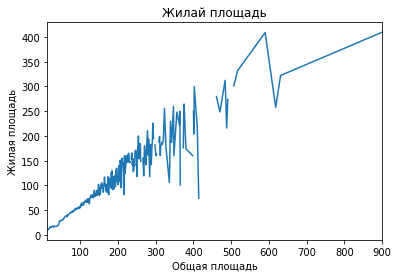

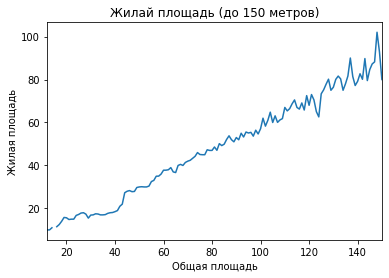

Text(0.5, 0, 'Общая площадь')

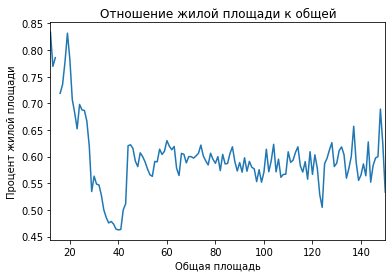

In [17]:
#Создам датафрейм с округленным значением общей площади и медианным значением жилой площади.
#Добавлю туда отношение жилой площади к общей

living_area_plot = df.groupby(by = df['total_area'].round(0))['living_area'].median()
living_area_plot = pd.DataFrame({'living_area': living_area_plot, 'living_area_percent': living_area_plot/living_area_plot.index})
living_area_plot.living_area.plot(title = 'Жилай площадь')
plt.ylabel('Жилая площадь')
plt.xlabel('Общая площадь')
plt.show()
living_area_plot.living_area[:150].plot(title = 'Жилай площадь (до 150 метров)')
plt.ylabel('Жилая площадь')
plt.xlabel('Общая площадь')
plt.show()
living_area_plot.living_area_percent[:150].plot(title = 'Отношение жилой площади к общей')
plt.ylabel('Процент жилой площади')
plt.xlabel('Общая площадь')

На графиках видно, что величины растут пропорционально, но есть много выбросов, поэтому заполнять пропущенные значения буду ориентируясь на общую площадь. Для этого добавлю в датафрейм новый признак - общую площадь, округленную до целых чисел.

In [18]:
df['total_area_round'] = df['total_area'].round(0)

In [19]:
def fill_living_area(row):
    total_area = row['total_area_round']
    return living_area_plot.living_area[total_area]
    

df.loc[df['living_area'].isna(), 'living_area'] = df.apply(fill_living_area, axis = 1)

In [20]:
df[df.living_area.isna()].T

,1388,2127,2243,3676,5893,9397,9826,10181,12040,12674,15016,16949,19392,22131
total_images,20,14,9,12,3,10,1,9,5,16,8,9,5,14
last_price,5.98e+07,3.25e+07,1.30278e+08,2.8789e+07,2.3e+08,1.6073e+07,4.31853e+07,3.5e+07,1.9e+06,1.4e+08,1.5e+08,1.55e+06,7.1e+07,2.7e+07
total_area,399,234,304,441.98,500,263.8,494.1,295,15,241,500,15,371,422.2
first_day_exposition,2015-01-21T00:00:00,2016-05-26T00:00:00,2015-07-24T00:00:00,2019-01-23T00:00:00,2017-05-31T00:00:00,2019-01-30T00:00:00,2017-05-12T00:00:00,2017-12-16T00:00:00,2018-06-27T00:00:00,2015-07-24T00:00:00,2016-01-13T00:00:00,2018-08-21T00:00:00,2018-07-26T00:00:00,2018-10-18T00:00:00
rooms,5,5,5,4,6,3,1,4,1,5,4,1,0,5
ceiling_height,5.6,3,3.11,3,3,2.75,2.85,2.55,2.5,3,3.2,2.7,3.57,2.7
floors_total,6,7,9,6,7,19,12,5,5,5,7,9,7,13
living_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,6,6,7,6,7,4,3,4,1,4,7,1,6,11
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски остались в квартирах с очень маленькой и очень большой площадью. Буду считать, что в 15 метровой квартире жилая площадь составляет 80%, а в остальных - 50% (основываясь на графиках)

In [21]:
df.loc[(df.living_area.isna()) & (df.total_area == 15), 'living_area'] = df.total_area*0.8
df.loc[(df.living_area.isna()), 'living_area'] = df.total_area*0.5

In [22]:
df.living_area.isna().sum()

0

Пропуски в living_area я убрал, теперь сделаю тоже самое для kitchen_area.

Отдельно рассмотрю случай studio = True. Для всех таких квартир площадь кухни неизвестна, заменю эти пропуски нулями, так как в студиях нет отдельного помещения для кухни.

In [23]:
df[df.studio == True].kitchen_area.isna().mean()

1.0

In [24]:
df.loc[df.studio == True, 'kitchen_area'] = 0

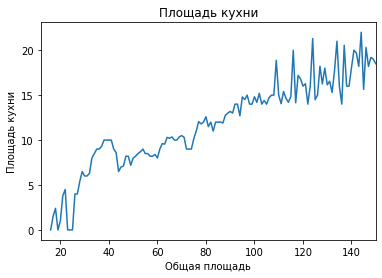

Text(0.5, 0, 'Общая площадь')

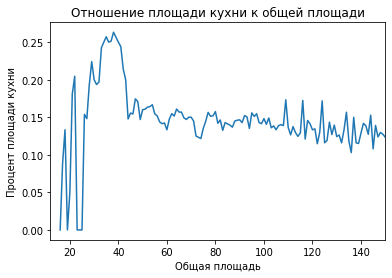

In [25]:
kitchen_area_plot = df.groupby(by = df['total_area'].round(0))['kitchen_area'].median()
kitchen_area_plot = pd.DataFrame({'kitchen_area': kitchen_area_plot, 
                                  'kitchen_area_percent': kitchen_area_plot/kitchen_area_plot.index})
kitchen_area_plot.kitchen_area[:150].plot(title = 'Площадь кухни')
plt.ylabel('Площадь кухни')
plt.xlabel('Общая площадь')
plt.show()
kitchen_area_plot.kitchen_area_percent[:150].plot(title = 'Отношение площади кухни к общей площади')
plt.ylabel('Процент площади кухни')
plt.xlabel('Общая площадь')

In [26]:
def fill_kitchen_area(row):
    total_area = row['total_area_round']
    return kitchen_area_plot.kitchen_area[total_area]
    

df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df.apply(fill_kitchen_area, axis = 1)

In [27]:
df[df.kitchen_area.isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_round
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.50,3.0,183.00,3,NaN,...,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,317.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6.0,199.50,6,NaN,...,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0,399.0
2127,14,32500000.0,234.0,2016-05-26T00:00:00,5,3.00,7.0,117.00,6,NaN,...,0.0,Санкт-Петербург,23987.0,4554.0,1.0,320.0,0.0,NaN,180.0,234.0
2243,9,130278280.0,304.0,2015-07-24T00:00:00,5,3.11,9.0,152.00,7,NaN,...,0.0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0,304.0
9826,1,43185328.0,494.1,2017-05-12T00:00:00,1,2.85,12.0,247.05,3,NaN,...,0.0,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,5.0,494.0
10181,9,35000000.0,295.0,2017-12-16T00:00:00,4,2.55,5.0,147.50,4,NaN,...,NaN,Санкт-Петербург,26711.0,5559.0,0.0,NaN,1.0,785.0,90.0,295.0
11436,4,24000000.0,316.3,2015-03-25T00:00:00,8,2.55,5.0,187.00,5,NaN,...,0.0,Санкт-Петербург,24555.0,5129.0,0.0,NaN,1.0,934.0,542.0,316.0
12040,5,1900000.0,15.0,2018-06-27T00:00:00,1,2.50,5.0,12.00,1,NaN,...,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0,15.0
12674,16,140000000.0,241.0,2015-07-24T00:00:00,5,3.00,5.0,120.50,4,NaN,...,0.0,Санкт-Петербург,23512.0,3503.0,3.0,413.0,3.0,83.0,399.0,241.0
16949,9,1550000.0,15.0,2018-08-21T00:00:00,1,2.70,9.0,12.00,1,NaN,...,NaN,Санкт-Петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,42.0,15.0


Здесь тоже квартиры можно разделить на две группы: до 20 метров и от 230 метров.

Для квартир до 20 метров буду считать кухню равной 25% от общей площади. Для остальных - 10%

In [28]:
kitchen_area_plot.kitchen_area_percent[230:].median()

0.09495000847314014

In [29]:
df.loc[(df.kitchen_area.isna()) & (df.total_area <= 20), 'kitchen_area'] = df.total_area*0.25
df.loc[(df.kitchen_area.isna()), 'kitchen_area'] = df.total_area*0.1

In [30]:
df.kitchen_area.isna().sum()

0

<a id='is_apartment,balcony'></a>
**is_apartment & balcony**

Преобразую признак is_apartment в числовой тип, чтобы посмотреть корреляцию с другими признаками. Также посмотрю на коррекляцию признака balcony.

In [31]:
df['is_apartment'] = pd.to_numeric(df['is_apartment'], errors='coerce')
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_round
total_images,1.000000,0.104473,0.115352,0.099288,0.003824,0.011147,0.101330,0.031340,0.046687,-0.029303,...,0.113942,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657,0.115344
last_price,0.104473,1.000000,0.653675,0.363343,0.070163,-0.006993,0.583132,0.026576,0.079716,-0.025362,...,0.489065,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146,0.653668
total_area,0.115352,0.653675,1.000000,0.758344,0.087969,-0.075652,0.943138,-0.024754,0.088458,-0.072653,...,0.632069,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675,0.999981
rooms,0.099288,0.363343,0.758344,1.000000,0.048346,-0.227227,0.830581,-0.150862,-0.000860,-0.147286,...,0.313951,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961,0.758362
ceiling_height,0.003824,0.070163,0.087969,0.048346,1.000000,-0.021346,0.085343,-0.007878,0.172207,0.002148,...,0.076067,0.035975,-0.018389,-0.082786,0.061208,-0.020793,0.068382,-0.048415,0.020554,0.087928
floors_total,0.011147,-0.006993,-0.075652,-0.227227,-0.021346,1.000000,-0.160112,0.678109,-0.078057,0.069522,...,0.125757,0.193770,0.106875,0.019284,-0.252489,0.096972,-0.122960,0.039055,-0.052559,-0.075666
living_area,0.101330,0.583132,0.943138,0.830581,0.085343,-0.160112,1.000000,-0.090243,0.090653,-0.056189,...,0.469100,0.018149,-0.051524,-0.229649,0.178635,-0.048746,0.148619,-0.084144,0.143990,0.943124
floor,0.031340,0.026576,-0.024754,-0.150862,-0.007878,0.678109,-0.090243,1.000000,-0.040646,0.036940,...,0.110688,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463,-0.024740
is_apartment,0.046687,0.079716,0.088458,-0.000860,0.172207,-0.078057,0.090653,-0.040646,1.000000,-0.009986,...,0.110406,0.092878,0.050980,0.010037,0.058156,-0.097669,0.062462,0.019008,0.020628,0.088400
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.002148,0.069522,-0.056189,0.036940,-0.009986,1.000000,...,-0.140956,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476,-0.072715


Рaссматриваемые признаки слабо коррелируют с остальными данными. Предполагаю, если этот признак не заполнили, квартира не является апартаментами или не имеет балкон. Поэтому просто заменю все пропуски на False

In [32]:
df.is_apartment = df.is_apartment.fillna(0)
df.balcony = df.balcony.fillna(0)

In [33]:
print(df.is_apartment.isna().mean())
df.balcony.isna().mean()

0.0


0.0

<a id='locality_name'></a>
**locality_name**

In [34]:
df.locality_name = df.locality_name.astype('str')

In [35]:
df.groupby('locality_name').cityCenters_nearest.count()

locality_name
nan                     41
Бокситогорск             0
Волосово                 0
Волхов                   0
Всеволожск               0
                        ..
село Путилово            0
село Рождествено         0
село Русско-Высоцкое     0
село Старая Ладога       0
село Шум                 0
Name: cityCenters_nearest, Length: 365, dtype: int64

In [36]:
sorted(df.locality_name.unique())

['nan',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 

Так как названия населенных пунктов повторяются, нужно исключить дубликаты. Я вижу два варианта:
1. Заменить похожие по смыслу названия на что-то одно (например, "поселок городского типа" и "городской поселок"). Минус этого способа в том, что в некоторых записях не указан тип населенного пункта. Из-за этого могут остаться дубликаты, либо придется исправлять их вручную с помощью какого-нибудь словаря исключений.
2. Забить на тип объекта и оставить только названия, при этом пострадает точность (например, в записях есть 'городской посёлок Павлово' и 'село Павлово' - скорее всего это разные объекты), зато это быстро.

Я использую быстрый вариант. Добавлю в датафрейм новый столбец с кратким названием населенного пункта (без типа населенного пункта). 

In [37]:
def find_locality_name(row):
    locality_name = row['locality_name']
    caps_lit_list = re.findall('([А-Я])', locality_name)
    try:
        result = locality_name[locality_name.index(caps_lit_list[0]):]
    except:
        result = 'nan'
    return result
    
    
    
df['locality_name_short'] = df.apply(find_locality_name, axis = 1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_round,locality_name_short
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0.0,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,108.0,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,0.0,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,40.0,Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,0.0,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,56.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,95.0,9,0.0,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,159.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0.0,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.0,Санкт-Петербург


In [38]:
df.query('locality_name_short == "nan"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_round,locality_name_short
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,0.0,...,nan,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,82.0,nan
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,3.00,4.0,42.60,2,0.0,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,34.0,80.0,nan
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.75,24.0,15.60,3,0.0,...,nan,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,43.0,nan
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.75,24.0,33.10,21,0.0,...,nan,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,62.0,nan
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.55,5.0,30.80,5,0.0,...,nan,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,46.0,nan
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,0.0,...,nan,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,90.0,nan
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,0.0,...,nan,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,80.0,nan
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,3.00,7.0,50.15,6,0.0,...,nan,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,83.0,nan
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,3.00,7.0,59.10,5,0.0,...,nan,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,86.0,nan
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.75,24.0,20.00,23,0.0,...,nan,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,30.0,nan


locality_name_short
nan                 8943.0
Александровская    27468.0
Белоостров         38868.0
Зеленогорск        53381.0
Колпино            32018.0
Красное Село       29140.5
Кронштадт          49575.0
Левашово           25727.0
Лисий Нос          28226.0
Ломоносов          51677.0
Металлострой       27602.0
Молодёжное         65764.0
Мурино             21888.0
Павловск           32683.0
Парголово          19311.0
Песочный           26099.5
Петергоф           33771.0
Петро-Славянка     27165.0
Понтонный          32354.0
Пушкин             27930.5
Репино             42896.5
Санкт-Петербург    12244.5
Сапёрный           35859.5
Сестрорецк         34821.0
Стрельна           23506.0
Усть-Ижора         28222.5
Шушары             24212.0
Щеглово            34085.0
Name: cityCenters_nearest, dtype: float64


Text(0, 0.5, 'Расстояние')

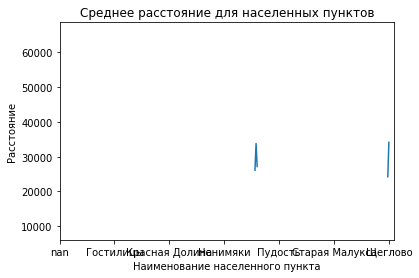

In [39]:
print(df.query('cityCenters_nearest.isna() == False').groupby('locality_name_short').cityCenters_nearest.median())
df.groupby('locality_name_short').cityCenters_nearest.median().plot(title='Среднее расстояние для населенных пунктов')
plt.xlabel('Наименование населенного пункта')
plt.ylabel('Расстояние')

Для большинства населенных пунктов не получилось определить среднее расстояние до центра. Только для 28 элементов этот признак не NaN. На графике видно, что информации очень мало. Рассмотрим процент населенных пунктов, для которых можно оценить среднее расстояние

In [40]:
len(df.query('cityCenters_nearest.isna() == False').groupby('locality_name_short'))/len(df.locality_name_short.unique())

0.0915032679738562

Видно, что только для 9% населенных пунктов можно рассчитать расстояние до центра.

____

<a id='cityCenters_nearest'></a>
**cityCenters_nearest**

В датафрейме 5519 пропусков в cityCenters_nearest. Я мог бы заполнить 690 из них (так как для остальных населенных пунктов данных нет). Но, наверное, не буду это делать, потому что медианное или среднее значение в данном случае не даст полезной информации о квартире.

In [41]:
#Количество пропусков в cityCenters_nearest в населенных пунктов из списка выше

summmm = 0

for i in df.query('cityCenters_nearest.isna()').groupby('locality_name_short').total_images.count().index:
    if i in df.query('cityCenters_nearest.isna() == False').groupby('locality_name_short').cityCenters_nearest.median().index:
        summmm += df.query('cityCenters_nearest.isna()').groupby('locality_name_short').total_images.count()[i]
summmm

690

In [42]:
#общее количество пропусков в cityCenters_nearest

df.query('cityCenters_nearest.isna()').groupby('locality_name_short').total_images.count().sum()

5519

Также не буду заполнять пропуски в столбцах **airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest**

<a id='days_exposition'></a>
**days_exposition**

Предполагаю, что продолжительность продажи зависит от месяца, когда было размещено объявление. Рассмотрю как менялась продолжительность продажи в разные годы

In [43]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

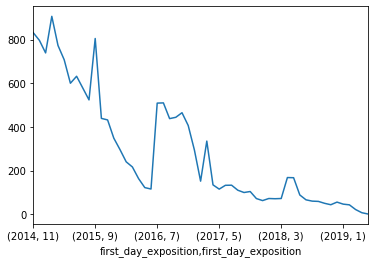

In [44]:
exposition_date = df.groupby(by=df.first_day_exposition)['days_exposition'].median()

exposition_month = exposition_date.groupby(by=[exposition_date.index.year, exposition_date.index.month]).median()
exposition_month.plot()

Заполню пропуски в данных в соответствии с тем в какой году и месяце было создано объявление о продаже

In [45]:
def fill_days_exposition(row):
    first_day_exposition = row['first_day_exposition']
    try:
        return exposition_month[first_day_exposition.year, first_day_exposition.month]
    except:
        return np.nan
    
df.loc[df.days_exposition.isna(), 'days_exposition'] = df.apply(fill_days_exposition, axis = 1)

In [46]:
df.days_exposition.isna().sum()

0

<a id='change_type'></a>
### Изменение типов данных
В процессе заполнения пропусков я уже заменил типы данных признаков **is_apartment**, **locality_name** и **first_day_exposition**

Думаю можно изменить:
* total_images, last_price, rooms, floors_total, floor, total_area_round на int
* is_apartment, balcony, studio, open_plan на bool

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null float64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds

In [48]:
for name in ['total_images', 'last_price', 'rooms', 'floors_total', 'floor', 'total_area_round']:
    df[name] = df[name].astype(int)
    
for name in ['is_apartment', 'balcony', 'studio', 'open_plan']:
    df[name] = df[name].astype(bool)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null bool
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<a id='Шаг_3'></a>
### Шаг 3. Посчитайте и добавьте в таблицу

Добавлю в таблицу:
* цену квадратного метра; **price_per_meter**
* день недели, месяц и год публикации объявления; **exposition_day exposition_month exposition_year**
* этаж квартиры; варианты — первый, последний, другой; **floor_type**
* соотношение жилой и общей площади, а также отношение площади кухни к общей. **living_area_percent kitchen_area_percent**

In [50]:
df['price_per_meter'] = df['last_price'] / df['total_area']
df['exposition_day'] = df.apply(lambda x: x['first_day_exposition'].dayofweek, axis = 1)
df['exposition_month'] = df.apply(lambda x: x['first_day_exposition'].month, axis = 1)
df['exposition_year'] = df.apply(lambda x: x['first_day_exposition'].year, axis = 1)

In [51]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        floor_type = 'Первый'
    elif floor == floors_total:
        floor_type = 'Последний'
    else:
        floor_type = 'Другой'
    return floor_type 
        
df['floor_type'] = df.apply(floor_type, axis = 1)
df['living_area_percent'] = df['living_area'] / df['total_area']
df['kitchen_area_percent'] = df['kitchen_area'] / df['total_area']

In [52]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_round,locality_name_short,price_per_meter,exposition_day,exposition_month,exposition_year,floor_type,living_area_percent,kitchen_area_percent
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,21.5,108,Санкт-Петербург,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,81.0,40,Шушары,82920.792079,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,558.0,56,Санкт-Петербург,92785.714286,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.60,14,95.0,9,False,...,424.0,159,Санкт-Петербург,408176.100629,4,7,2015,Другой,0.597484,0.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121.0,100,Санкт-Петербург,100000.000000,1,6,2018,Другой,0.320000,0.410000


<a id='Шаг_4'></a>
### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<a id='Шаг_4.1'></a>
* Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

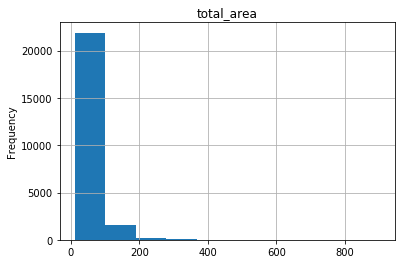

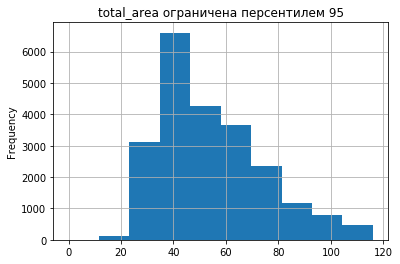

------------------


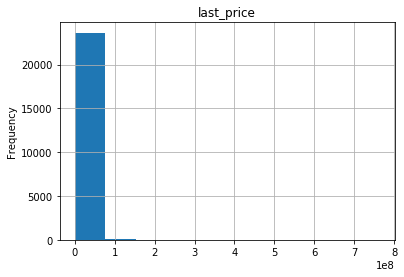

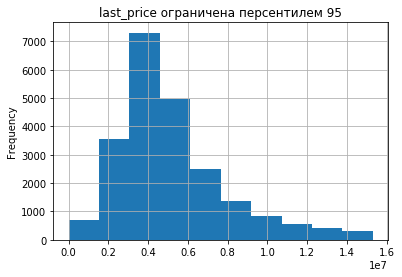

------------------


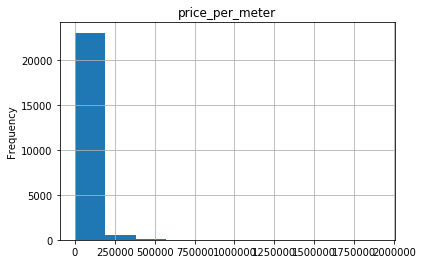

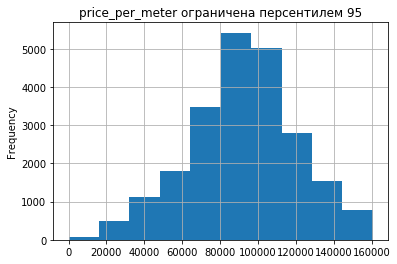

------------------


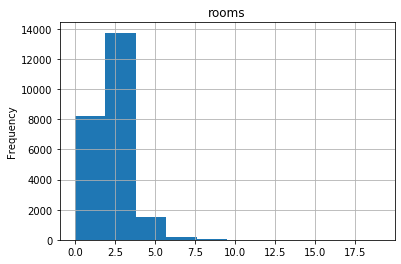

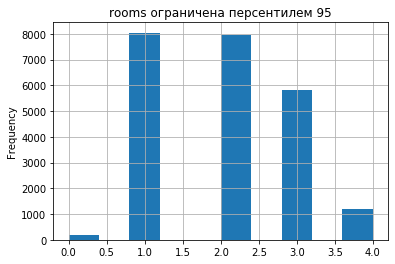

------------------


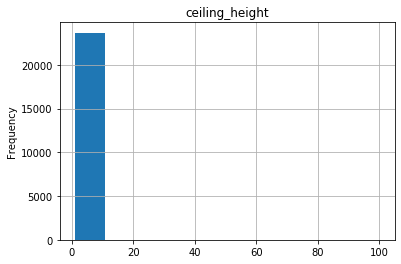

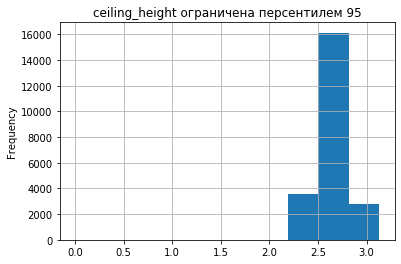

------------------


In [53]:
for name in ['total_area', 'last_price', 'price_per_meter', 'rooms', 'ceiling_height']:
    df[name].plot(kind='hist', title = name, grid = True)
    plt.show()
    df[name].plot(kind='hist', title = name+' ограничена персентилем 95' , range=(0, df[name].quantile(0.95)), grid = True)
    plt.show()
    print('------------------')

### Вывод
1. Большая часть квартир имеет площадь от 20 до 120 метров. Самый популярный вариант - 40 метров
2. Цены от 2 млн до 15 млн, 30% квартир стоит 4 млн.
3. В основном квадратный метр стоит от 60 до 120 тысяч
4. 2/3 квартир имеют 1 или 2 комнаты, но есть варианты и с 17 комнатами.
5. Большая часть квартир имеет потолки от 2,5 до 3 метров.

___

<a id='Шаг_4.2'></a>
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

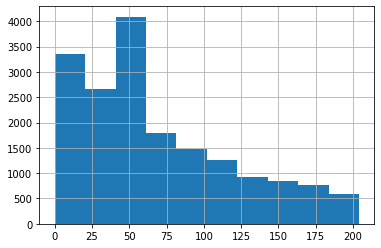

In [81]:
df.days_exposition.hist(range=(0, df.days_exposition.quantile(0.75)))

In [55]:
print(f'Медиана days_exposition {df.days_exposition.median():.2f}')
print(f'Среднее days_exposition {df.days_exposition.mean():.2f}')

Медиана days_exposition 81.00
Среднее days_exposition 165.55


На графике видно, что 40% всех квартир было продано за 50 дней или меньше. Можно считать, что квартира была продана быстро, если процесс занял меньше 50 дней. 

Когда я занимался заполнением пропусков, обратил внимание, что продолжительность продажи сильно зависит от года и месяца. Рассмотрю данные в этом разрезе. 

Text(0, 0.5, 'Продолжительность, дни')

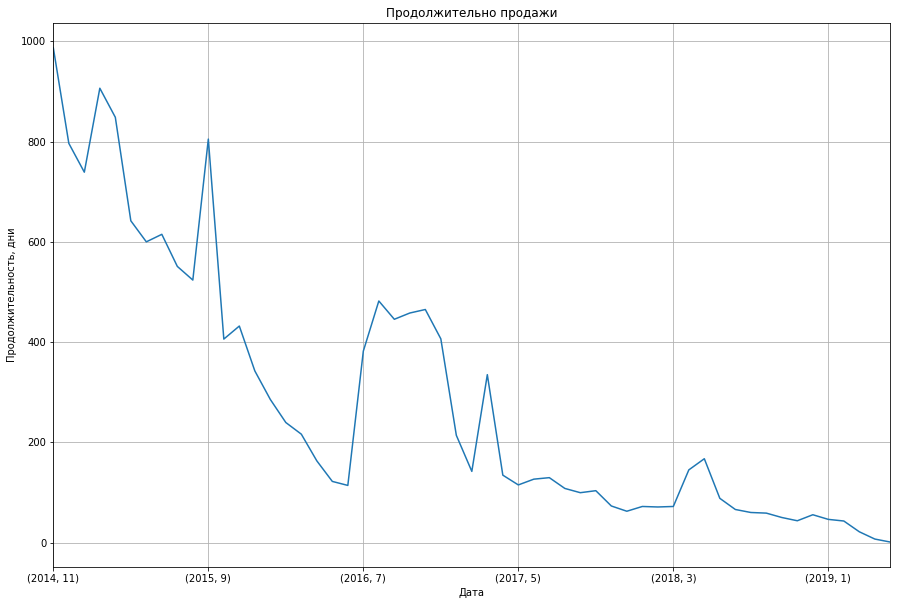

In [56]:
df.groupby(['exposition_year', 'exposition_month']).days_exposition.median().plot(grid=True, figsize=(15,10), title='Продолжительно продажи')
plt.xlabel('Дата')
plt.ylabel('Продолжительность, дни')

У графика есть несколько пиков, возможно в 2014 и 2016 годах был экономический кризис и у людей не было денег на покупку недвижимости

Рассмотрю количество объявлений о продаже недвижимости по месяцам:

Text(0, 0.5, 'Количество')

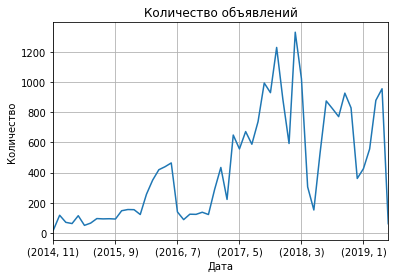

In [57]:
df.groupby(['exposition_year', 'exposition_month']).days_exposition.count().plot(grid=True, title = 'Количество объявлений')
plt.xlabel('Дата')
plt.ylabel('Количество')

Если сопоставить два последних графика, можно сделать вывод, что с ростом количества объявлений снизилось время продажи квартир. Возможно, это говорит о том, что сейчас спрос превышает предложение.

___

<a id='Шаг_4.3'></a> 
* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Ограничу значения нулем снизу и (квантилем 0.75 + 1.5 iqr) сверху для признаков Общая площадь, Цена за метр, Количество комнат, Высота потолков. Сохраню данные в новый датафрейм **small_df**

In [58]:
names_dict = {}
for name in ['total_area', 'price_per_meter', 'rooms', 'ceiling_height']:
    q1 = df[name].quantile(0.25)
    q3 = df[name].quantile(0.75)
    iqr = q3-q1
    names_dict[name] = q3 + 1.5*iqr
        

small_df = df.loc[df.total_area < names_dict["total_area"]]
small_df = small_df[small_df.price_per_meter < names_dict["price_per_meter"]]
small_df = small_df[small_df.rooms < names_dict["rooms"]]
small_df = small_df[small_df.ceiling_height < names_dict["ceiling_height"]]
small_df.reset_index(drop=True)
print()

Рассмотрю графики из прошлого пункта на новом датафрейме


Синий - старые данные по продолжительности продажи, красный - новые


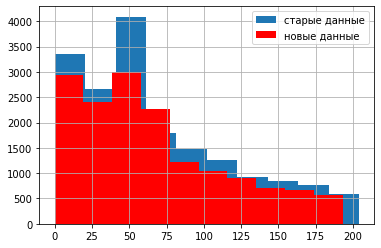

days_exposition старые данные


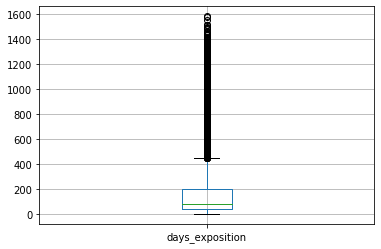

days_exposition новые данные


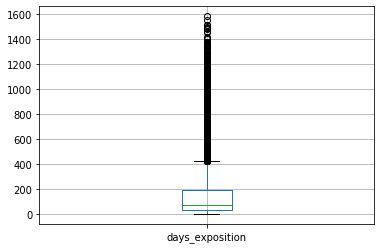

Старая медиана 81.00, новая медиана 75.00
Старое среднее 165.55, новое среднее 157.73


In [59]:
print()
print('Синий - старые данные по продолжительности продажи, красный - новые')
df.days_exposition.hist(range=(0, df.days_exposition.quantile(0.75)), label='старые данные')
small_df.days_exposition.hist(range=(0, small_df.days_exposition.quantile(0.75)), color='red', label='новые данные')
plt.legend()
plt.show()
print('days_exposition старые данные')
df.boxplot(column='days_exposition')
plt.show()
print('days_exposition новые данные')
small_df.boxplot(column='days_exposition')
plt.show()
print(f'Старая медиана {df.days_exposition.median():.2f}, новая медиана {small_df.days_exposition.median():.2f}')
print(f'Старое среднее {df.days_exposition.mean():.2f}, новое среднее {small_df.days_exposition.mean():.2f}')

После избавления от выбросов в отдельных признаках средняя продолжительность продажи немного уменьшилась.
___

<a id='Шаг_4.4'></a>
* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [60]:
small_df.corr().last_price

total_images            0.171769
last_price              1.000000
total_area              0.741119
rooms                   0.451145
ceiling_height          0.313202
floors_total            0.231653
living_area             0.608240
floor                   0.161683
is_apartment            0.019826
studio                 -0.066832
open_plan              -0.043797
kitchen_area            0.531396
balcony                 0.026829
airports_nearest       -0.017342
cityCenters_nearest    -0.308651
parks_around3000        0.095869
parks_nearest           0.062242
ponds_around3000        0.126616
ponds_nearest          -0.045552
days_exposition         0.060210
total_area_round        0.740949
price_per_meter         0.651196
exposition_day         -0.010726
exposition_month        0.004703
exposition_year        -0.006201
living_area_percent     0.012509
kitchen_area_percent   -0.092015
Name: last_price, dtype: float64

На общую стоимость квартиры влияют показатели Площадь, количество комнат, растояние до центра

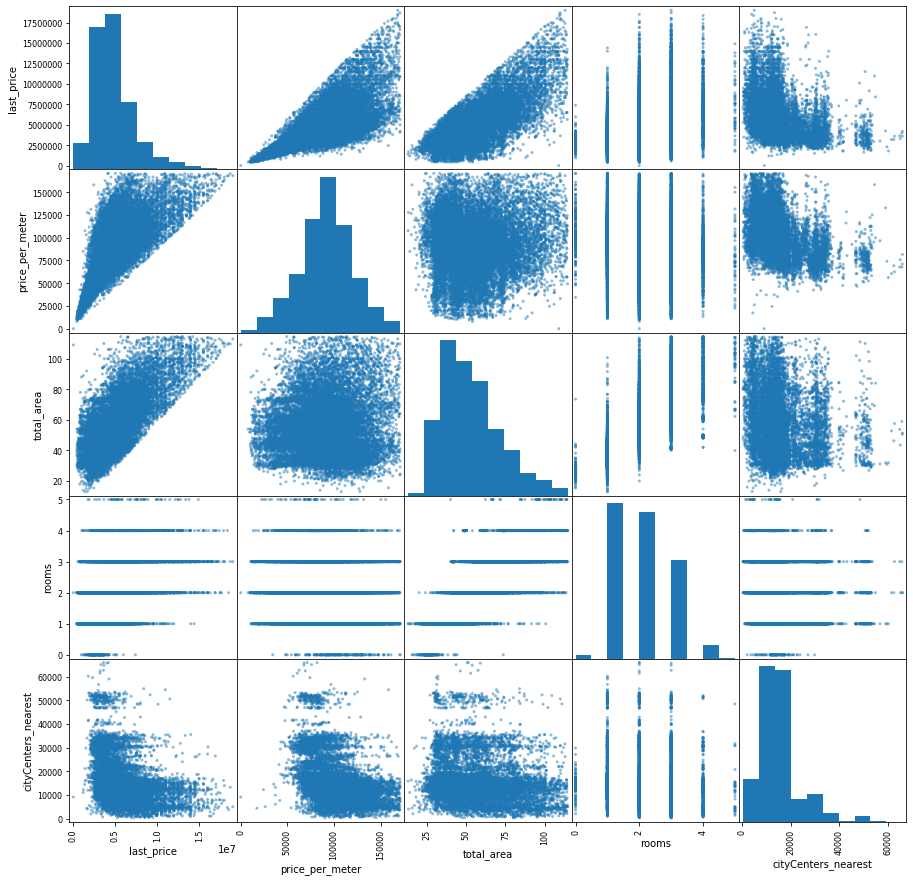

In [61]:
pd.plotting.scatter_matrix(small_df[['last_price', 'price_per_meter', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(15, 15))
plt.show()

С увеличением общей цены квартиры:
* увеличивается общая площадь
* увеличивается количество комнат. Хотя среди дешевых квартир есть и однокомнатные, и четырехкомнатные
* увеличивается растояние до центра 

Цена за метр:
* Площадь особо не влияет на цену квадратного метра. Единственное, на графике много точек в правом верхнем углу, поэтому можно предположить: Если метраж большой, то и квадратный метр будет стоить дорого. 
* В однокомнатных квартирах квадратный метр стоит дороже, чем в остальных
* Чем дальше от центра, тем дешевле
___


Рассмотрю зависимость стоимости от этажа:

In [62]:
print('Средняя цена квадратного метра')
small_df.groupby('floor_type').price_per_meter.agg({'median', 'count'})

Средняя цена квадратного метра


,median,count
floor_type,,
Другой,96250.000000,15401
Первый,79439.252336,2665
Последний,84286.520190,2886


Можно сделать вывод, что квартиры на первом и последнем этаже обычно стоят дешевле остальных.
___

Рассмотрю зависимость цены от дня недели:

In [63]:
print('Медиана стоимости кв.метра по дням')
small_df.groupby('exposition_day').price_per_meter.agg({'median', 'count'})

Медиана стоимости кв.метра по дням


,median,count
exposition_day,,
0,92307.692308,3185
1,93360.215054,3712
2,93220.338983,3482
3,92814.371257,3729
4,92332.268371,3557
5,91245.136187,1739
6,92598.866722,1548


Во вторник и среду цена немного выше, чем в другие дни. В выходные количество объявлений меньше, чем в рабочие дни.
___
Рассмотрю зависимость от месяца

In [64]:
print('Медиана стоимости кв.метра по месяцам')
small_df.groupby('exposition_month').price_per_meter.agg({'mean', 'count'})

Медиана стоимости кв.метра по месяцам


,mean,count
exposition_month,,
1,92034.566773,1329
2,91380.142942,2323
3,92425.959621,2290
4,93311.079164,2119
5,90935.467162,1115
6,89244.953654,1569
7,91150.928270,1470
8,93126.549613,1546
9,92881.328006,1740


В апреле и августе цена кв.метра в среднем выше, чем в другие месяцы
___
Рассмотрю зависимость по годам:

In [65]:
print('Медиана стоимости кв.метра по годам')
print(small_df.groupby('exposition_year').price_per_meter.agg({'median', 'count'}))

Медиана стоимости кв.метра по годам
                        median  count
exposition_year                      
2014              98603.839442     89
2015              90495.431733    982
2016              89378.238342   2423
2017              90225.563910   7289
2018              93797.276853   7649
2019             101369.450194   2520


Стоимость кв.метра растет.
___

<a id='Шаг_4.5'></a>
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

Количество объявлений в наиболее популярных населенных пунктах:
locality_name_short
Санкт-Петербург    13191
Мурино               588
Кудрово              471
Шушары               436
Всеволожск           391
Пушкин               333
Парголово            326
Колпино              326
Гатчина              299
Выборг               216
Name: total_images, dtype: int64


Text(0, 0.5, 'Цена кв.метра')

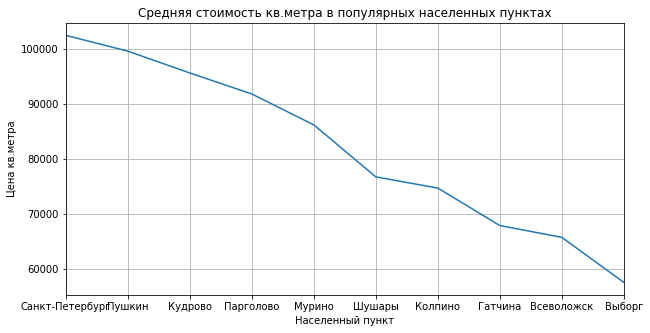

In [68]:
most_popular_locality = small_df.groupby('locality_name_short').total_images.count().sort_values(ascending=False).head(10)
print('Количество объявлений в наиболее популярных населенных пунктах:')
print(most_popular_locality)


(small_df.query('locality_name_short in @most_popular_locality.index')
 .groupby('locality_name_short')
 .price_per_meter
 .median()
 .sort_values(ascending=False)
 .plot(grid=True, figsize=(10,5), title='Средняя стоимость кв.метра в популярных населенных пунктах'))
plt.xlabel('Населенный пункт')
plt.ylabel('Цена кв.метра')


Дороже всего жилье в Санкт-Петербурге, дешевле всего в Выборге
___

<a id='Шаг_4.6'></a>
* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

Добавлю новый показатель **cityCenters_nearest_km** растояние до центра в километрах

In [69]:
def cityCenters_nearest_km(row):
    cityCenters_nearest = row['cityCenters_nearest']
    return cityCenters_nearest//1000
    

small_df['cityCenters_nearest_km'] = df.apply(cityCenters_nearest_km, axis=1)

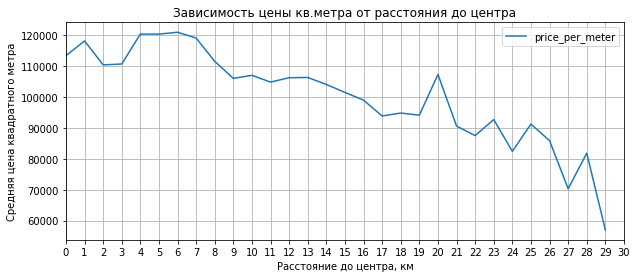

In [70]:
(small_df
 .query('locality_name_short == "Санкт-Петербург"')
 .groupby('cityCenters_nearest_km')
 .price_per_meter
 .mean()
 .plot(xticks=range(31), grid=True, figsize=(10,4), title='Зависимость цены кв.метра от расстояния до центра')
)
plt.ylabel('Средняя цена квадратного метра')
plt.xlabel('Расстояние до центра, км')
plt.legend()

Считаю, что граница центральной зоны находится на расстоянии 7 км от центра.
___

<a id='Шаг_4.7'></a>
* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [71]:
def central_zone(row):
    cityCenters_nearest_km = row['cityCenters_nearest']//1000
    if cityCenters_nearest_km <= 7:
        return 1
    else:
        return 0
    

small_df['central_zone'] = df.apply(central_zone, axis = 1)

sbp_df = small_df.query('locality_name_short == "Санкт-Петербург"')

(
sbp_df
    .groupby(by='central_zone')[['total_area','last_price', 'rooms', 'ceiling_height']]
    .mean()    
)

,total_area,last_price,rooms,ceiling_height
central_zone,,,,
0,52.855817,5.435499e+06,1.910394,2.646935
1,66.229157,7.730836e+06,2.302227,2.769899


У квартир в центральной зоне все рассматриваемые признаки (площадь, цена, число комнат, высота потолков) больше, чем в нецентральной зоне.

Рассмотрю как влияет на цену число комнат, этаж, удалённость от центра, дата размещения объявления:

Распределние для floor_type
                   median  count
floor_type                      
Другой      121698.113208   1311
Первый      102727.272727    261
Последний   110740.835683    314
---------
Распределние для rooms
rooms
0     11
1    391
2    694
3    610
4    167
5     13
Name: price_per_meter, dtype: int64


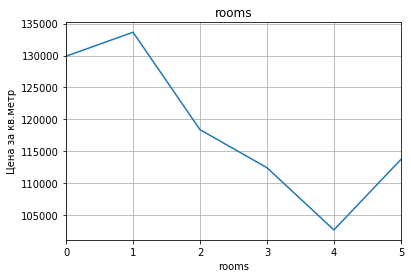

---------
Распределние для cityCenters_nearest_km
cityCenters_nearest_km
0.0     23
1.0     89
2.0    110
3.0    247
4.0    426
5.0    404
6.0    287
7.0    300
Name: price_per_meter, dtype: int64


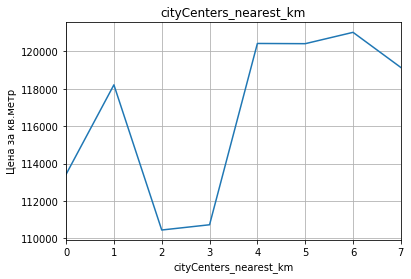

---------
Распределние для exposition_day
exposition_day
0    276
1    315
2    316
3    381
4    328
5    154
6    116
Name: price_per_meter, dtype: int64


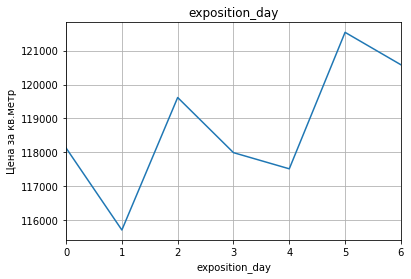

---------
Распределние для exposition_month
exposition_month
1     114
2     187
3     189
4     182
5     107
6     156
7     132
8     148
9     171
10    178
11    190
12    132
Name: price_per_meter, dtype: int64


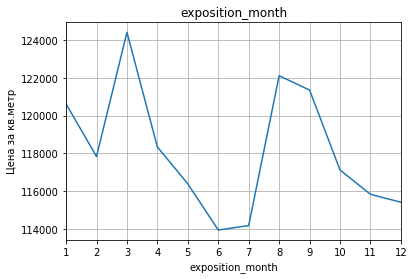

---------
Распределние для exposition_year
exposition_year
2014      7
2015    170
2016    265
2017    707
2018    569
2019    168
Name: price_per_meter, dtype: int64


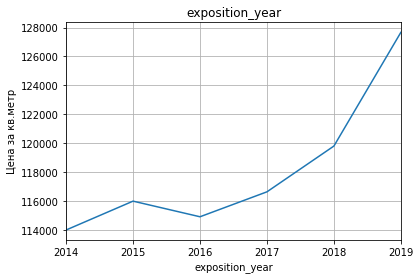

---------


In [72]:
central_zone_df = sbp_df.query('central_zone == 1')
print('\033[1m'+'Распределние для floor_type'+'\033[0m')
print(central_zone_df.groupby('floor_type').price_per_meter.agg({'count', 'median'}))
print('---------')
for name in ['rooms', 'cityCenters_nearest_km', 'exposition_day', 'exposition_month', 'exposition_year']:
    print ('\033[1m' + 'Распределние для ' + name + '\033[0m')
    print(central_zone_df.groupby(name).price_per_meter.count())
    central_zone_df.groupby(name).price_per_meter.mean().plot(grid=True, xticks=central_zone_df[name].unique(), title=name)
    plt.ylabel('Цена за кв.метр')
    plt.show()
    print('---------')


По графикам можно сделать следующие выводы:
* С увеличением числа комнат, цена кв.метра падает
* Квартиры на первом и последнем этаже стоят дешевле других
* Зависимости от удаленности от центра нет
* В выходные появляются объявления с более высокой ценой за кв.метр, чем в рабочие дни
* Наиболее дорогие квартиры в марте и августе
* С каждым годом цена квадратного метра растет

Если сравнивать центральную зону со всеми квартирами, выводы примерно одинаковые, разница только в том, что в центральной зоне на цену не влияет удаленность от центра. Но центральная зона - это и есть центр, так что можно считать, что я правильно определил его границы. Кроме этого, в центральной зоне наиболее дорогие квартиры выставляют на продажу в выходные, а когда рассматривал все квартиры наиболее дорогие квартиры выставляли на продажу в середине недели. 

<a id='Шаг_5'></a>
### Шаг 5. Общий вывод

Основные признаки, влияющие на стоимость квартиры: площадь квартиры, удаленность от центра, этаж (первый, последний)